In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
masterData = pd.read_csv("speedTest3.txt")
masterData["timeRaw"] = masterData["timeRaw"].apply(lambda p: p.split("=")[1]).apply(int)
masterData["dutyCycleRaw"] = masterData["dutyCycleRaw"].apply(lambda p: p.split("=")[1]).apply(int)
masterData["encoderRaw"] = masterData["encoderRaw"].apply(lambda p: p.split("=")[1]).apply(int)
masterData

,timeRaw,dutyCycleRaw,encoderRaw
0,4077,0,0
1,4078,1,0
2,4078,1,0
3,4079,1,0
4,4081,1,0
...,...,...,...
206139,514928,0,-629340
206140,514930,0,-629340
206141,514933,0,-629340
206142,514935,0,-629340


In [3]:
masterData["Time"] = masterData["timeRaw"] / 1000 # ms => s
masterData["Duty Cycle"] = masterData["dutyCycleRaw"] / 255 * 100 # 0-255 => 0-100%
masterData["Encoder"] = - masterData["encoderRaw"] / 12 / 298 * 360 # counts => deg

In [20]:
masterData["eSmoothed"] = masterData["Encoder"].rolling(1000).mean()

masterData["eVel"] = masterData["eSmoothed"].diff() / masterData["Time"].diff()
masterData["eVelSmoothed"] = masterData["eVel"].rolling(100).mean()

masterData["eAcc"] = masterData["eVelSmoothed"].diff() / masterData["Time"].diff()
masterData["eAccSmoothed"] = masterData["eAcc"].rolling(100).mean()

<AxesSubplot: xlabel='Time', ylabel='eVelSmoothed'>

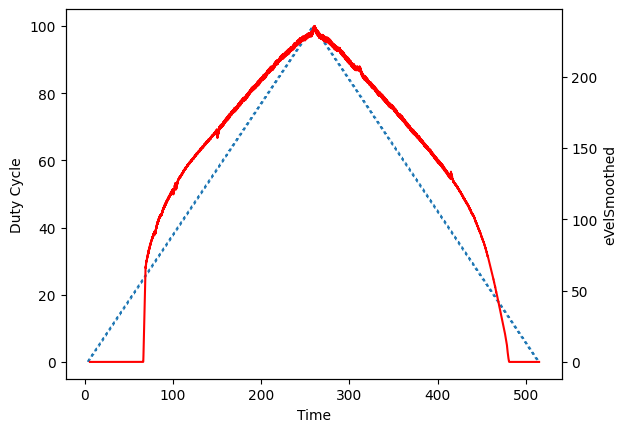

In [27]:
a = sns.lineplot( x=masterData["Time"][::10], y=masterData["Duty Cycle"][::10], dashes=(2, 2))
sns.lineplot( x=masterData["Time"][::10], y=masterData["eVelSmoothed"][::10], ax=a.axes.twinx(), color="r")
# sns.lineplot( x=masterData["Time"][::10], y=masterData["eSmoothed"][::10], ax=a.axes.twinx(), color="g")

In [34]:
l//2

103072

206144

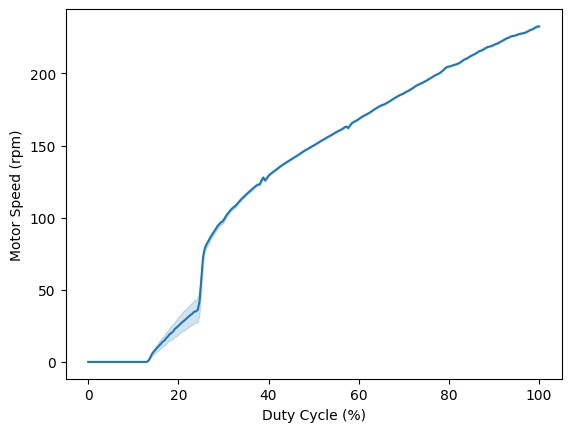

In [32]:
l = len(masterData)
a = sns.lineplot(x=masterData["Duty Cycle"][:l//2:10],  y=masterData["eVelSmoothed"][l//2::10])
a.set(xlabel="Duty Cycle (%)")
a.set(ylabel="Motor Speed (rpm)")
l